<a href="https://colab.research.google.com/github/prado3003/Confusion-matrix/blob/main/YOLO_Network_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLOv5 Transfer Learning: Fire Hydrants and Stop Signs

## --- 1. INTRODUCTION ---
# This notebook demonstrates how to apply Transfer Learning using YOLOv5 to detect
## two specific classes from the COCO dataset: Fire Hydrant and Stop Sign.


# 2. SETTING UP THE ENVIRONMENT

In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt


fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


In [ ]:
!pip install fiftyone



# 3. PREPARING THE DATASET

# We will use FiftyOne to download a subset of the COCO dataset containing only the classes:
# - fire hydrant
# - stop sign

In [ ]:
import fiftyone as fo
import fiftyone.zoo as foz

# Baixar subconjunto COCO com apenas fire hydrant (11) e stop sign (13)
train_dataset = foz.load_zoo_dataset(
    "coco-2017",
    split="train",
    label_types=["detections"],
    classes=["fire hydrant", "stop sign"],
    max_samples=1000,  # Ajuste conforme GPU disponível
    only_matching=True
)

val_dataset = foz.load_zoo_dataset(
    "coco-2017",
    split="validation",
    label_types=["detections"],
    classes=["fire hydrant", "stop sign"],
    max_samples=200,  # Ajuste conforme GPU disponível
    only_matching=True
)

INFO:fiftyone.zoo.datasets:Downloading split 'train' to '/root/fiftyone/coco-2017/train' if necessary


Found annotations at '/root/fiftyone/coco-2017/raw/instances_train2017.json'


INFO:fiftyone.utils.coco:Found annotations at '/root/fiftyone/coco-2017/raw/instances_train2017.json'


Sufficient images already downloaded


INFO:fiftyone.utils.coco:Sufficient images already downloaded


Existing download of split 'train' is sufficient


INFO:fiftyone.zoo.datasets:Existing download of split 'train' is sufficient


Loading existing dataset 'coco-2017-train-1000'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


INFO:fiftyone.zoo.datasets:Loading existing dataset 'coco-2017-train-1000'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/root/fiftyone/coco-2017/validation' if necessary


Found annotations at '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Found annotations at '/root/fiftyone/coco-2017/raw/instances_val2017.json'


Only found 148 (<200) samples matching your requirements


INFO:fiftyone.utils.coco:Downloading 148 images


 100% |██████████████████| 148/148 [14.8s elapsed, 0s remaining, 10.1 images/s]      


INFO:eta.core.utils: 100% |██████████████████| 148/148 [14.8s elapsed, 0s remaining, 10.1 images/s]      


Writing annotations for 148 downloaded samples to '/root/fiftyone/coco-2017/validation/labels.json'


INFO:fiftyone.utils.coco:Writing annotations for 148 downloaded samples to '/root/fiftyone/coco-2017/validation/labels.json'


Dataset info written to '/root/fiftyone/coco-2017/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/coco-2017/info.json'


Loading 'coco-2017' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'validation'


 100% |█████████████████| 148/148 [317.1ms elapsed, 0s remaining, 473.4 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 148/148 [317.1ms elapsed, 0s remaining, 473.4 samples/s]      


Dataset 'coco-2017-validation-200' created


INFO:fiftyone.zoo.datasets:Dataset 'coco-2017-validation-200' created


# Export to YOLOv5 format

In [ ]:
train_dataset.export(
    export_dir="datasets/hydrant_stop",
    dataset_type=fo.types.YOLOv5Dataset,
    split="train"
)

val_dataset.export(
    export_dir="datasets/hydrant_stop",
    dataset_type=fo.types.YOLOv5Dataset,
    split="val"
)

Directory 'datasets/hydrant_stop' already exists; export will be merged with existing files


 100% |███████████████| 1000/1000 [1.6s elapsed, 0s remaining, 643.0 samples/s]         


INFO:eta.core.utils: 100% |███████████████| 1000/1000 [1.6s elapsed, 0s remaining, 643.0 samples/s]         


Directory 'datasets/hydrant_stop' already exists; export will be merged with existing files


 100% |█████████████████| 148/148 [216.2ms elapsed, 0s remaining, 684.5 samples/s]     


INFO:eta.core.utils: 100% |█████████████████| 148/148 [216.2ms elapsed, 0s remaining, 684.5 samples/s]     


# 4. YOLO DATASET CONFIGURATION
# -----------------------------------------------------------
## Create a .yaml file indicating paths, number of classes, and class names.

In [ ]:
%%writefile hydrant_stop.yaml
train: /content/yolov5/datasets/hydrant_stop/images/train
val: /content/yolov5/datasets/hydrant_stop/images/val

nc: 2
names: ['fire hydrant', 'stop sign']

Overwriting hydrant_stop.yaml


# 5. TRAINING WITH TRANSFER LEARNING
# -----------------------------------------------------------
# We will use the pre-trained model yolov5s.pt (lightweight and fast)

In [ ]:
!python train.py --img 640 --batch 16 --epochs 50 --data hydrant_stop.yaml --weights yolov5s.pt


A saída de streaming foi truncada nas últimas 5000 linhas.
      11/49      4.48G    0.03343    0.01046   0.001446         42        640:  95% 60/63 [00:30<00:01,  2.16it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      11/49      4.48G    0.03338    0.01044   0.001439         30        640:  97% 61/63 [00:31<00:01,  1.94it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      11/49      4.48G    0.03335    0.01046    0.00144         37        640:  98% 62/63 [00:31<00:00,  2.31it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      11/49      4.48G    0.0

6. MODEL EVALUATION
# -----------------------------------------------------------
# Evaluate the trained model using the validation set.

In [ ]:
!python val.py --weights runs/train/exp2/weights/best.pt --data hydrant_stop.yaml --img 640

val: data=hydrant_stop.yaml, weights=['runs/train/exp2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-422-g2540fd4c Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/yolov5/datasets/hydrant_stop/labels/val.cache... 148 images, 0 backgrounds, 0 corrupt: 100% 148/148 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 5/5 [00:04<00:00,  1.09it/s]
                   all        148        176        0.9       0.85      0.881      0.697
          fire hydrant        148        101      0.934      0.841      0.894      0.665
             stop s

# 7. INFERENCE AND VISUAL COMPARISON
# -----------------------------------------------------------

In [ ]:
!python detect.py --weights runs/train/exp2/weights/best.pt --img 640 --source /content/yolov5/datasets/hydrant_stop/images/val

detect: weights=['runs/train/exp2/weights/best.pt'], source=/content/yolov5/datasets/hydrant_stop/images/val, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-422-g2540fd4c Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/148 /content/yolov5/datasets/hydrant_stop/images/val/000000000724.jpg: 640x480 2 stop signs, 51.1ms
image 2/148 /content/yolov5/datasets/hydrant_stop/images/val/000000008899.jpg: 544x640 1 fire hydrant, 50.5ms
image 3/148 /content/yolov5/datasets/hydrant_stop/images/val/00000

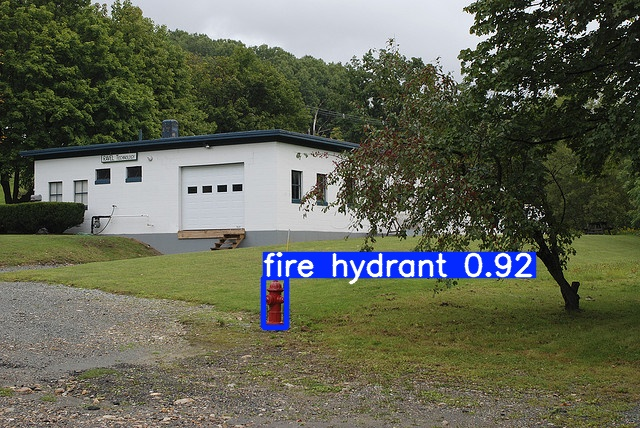

In [ ]:
import os
import random
from IPython.display import Image, display
import glob

# Encontra o diretório de detecção mais recente
detection_dirs = sorted(glob.glob('runs/detect/exp*'))
latest_detection_dir = detection_dirs[-1]

# Lista de todas as imagens no diretório de detecção mais recente
image_files = [os.path.join(latest_detection_dir, f) for f in os.listdir(latest_detection_dir) if f.endswith(('.jpg', '.png'))]

# Escolhe uma imagem aleatória da lista
random_image_path = random.choice(image_files)

# Exibe a imagem
display(Image(filename=random_image_path))

In [ ]:
# Executando a detecção com o modelo pré-treinado original para uma comparação visual
!python detect.py --weights yolov5s.pt --data hydrant_stop.yaml --img 640 --source /content/yolov5/datasets/hydrant_stop/images/val --name yolov5s_pretrained_detections

detect: weights=['yolov5s.pt'], source=/content/yolov5/datasets/hydrant_stop/images/val, data=hydrant_stop.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=yolov5s_pretrained_detections, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-422-g2540fd4c Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/148 /content/yolov5/datasets/hydrant_stop/images/val/000000000724.jpg: 640x480 1 truck, 1 stop sign, 33.7ms
image 2/148 /content/yolov5/datasets/hydrant_stop/images/val/000000008899.jpg: 544x640 1 bicycle, 1 fire hydrant, 32.9ms
image 3/148 /content/yolov5/datasets/hyd

Gerando uma comparação visual aleatória...


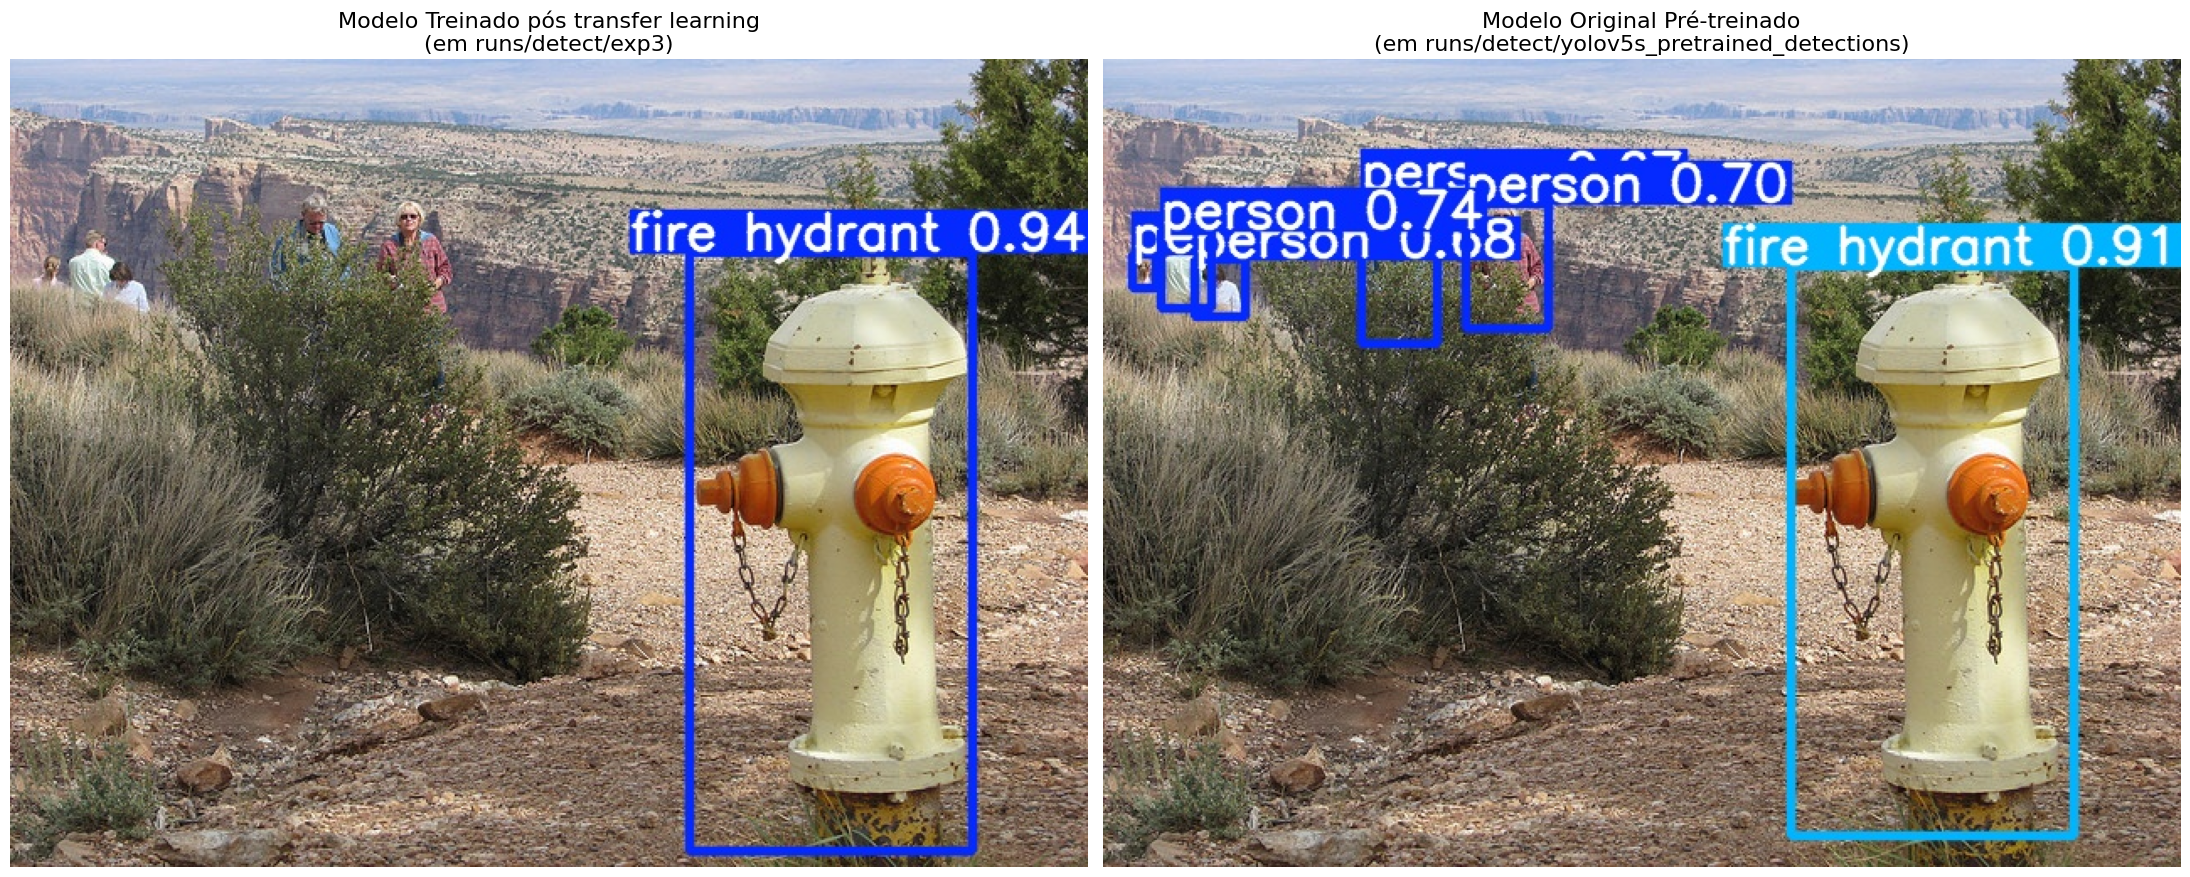

In [ ]:
import os
import random
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

print("Gerando uma comparação visual aleatória...")

# Encontrar o diretório de detecção mais recente do seu modelo treinado
# (excluindo o diretório do modelo pré-treinado, caso o nome corresponda ao padrão)
all_detect_dirs = sorted(glob.glob('runs/detect/exp*'))
tuned_detect_dirs = [d for d in all_detect_dirs if 'yolov5s_pretrained_detections' not in d]
latest_tuned_dir = tuned_detect_dirs[-1]

# Diretório de detecção do modelo pré-treinado original
pretrained_dir = 'runs/detect/yolov5s_pretrained_detections'

# Listar as imagens disponíveis no diretório do modelo original para escolher uma
try:
    available_images = os.listdir(pretrained_dir)
    # Escolher uma imagem aleatória
    random_image_name = random.choice(available_images)

    # Construir os caminhos completos para as duas imagens de resultado
    tuned_image_path = os.path.join(latest_tuned_dir, random_image_name)
    pretrained_image_path = os.path.join(pretrained_dir, random_image_name)

    # Verificar se a imagem correspondente existe em ambos os diretórios
    if os.path.exists(tuned_image_path) and os.path.exists(pretrained_image_path):
        # Configurar a exibição lado a lado
        fig, ax = plt.subplots(1, 2, figsize=(22, 11))

        # Imagem do seu modelo treinado (Ajuste Fino)
        ax[0].imshow(mpimg.imread(tuned_image_path))
        ax[0].set_title(f'Modelo Treinado pós transfer learning\n(em {latest_tuned_dir})', fontsize=16)
        ax[0].axis('off')

        # Imagem do modelo pré-treinado original
        ax[1].imshow(mpimg.imread(pretrained_image_path))
        ax[1].set_title(f'Modelo Original Pré-treinado\n(em {pretrained_dir})', fontsize=16)
        ax[1].axis('off')

        plt.tight_layout()
        plt.show()
    else:
        print(f"ERRO: A imagem '{random_image_name}' foi encontrada no diretório do modelo original, mas não no diretório do seu modelo ('{latest_tuned_dir}').")
        print("Certifique-se de que ambos os scripts de detecção foram executados no mesmo conjunto de imagens.")

except (FileNotFoundError, IndexError):
    print("ERRO: Não foi possível encontrar os diretórios de detecção.")
    print(f"Verifique se os seguintes diretórios existem: '{latest_tuned_dir}' e '{pretrained_dir}'.")
    print("Execute as células de detecção anteriores se necessário.")